<a href="https://colab.research.google.com/github/YomarPeralta/ModelosProyectoAire/blob/main/TecnicaGRU_Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from sklearn.preprocessing import LabelEncoder
filename = "Dataset_Aire_14197.csv"
data = pandas.read_csv(filename, header=0)
#print(data.head(100))
#trainy=data['locationId']
#print(trainy.head(100))
data_sc=data.drop("country",axis=1)
data_sc=data_sc.drop("utc",axis=1)
data_sc=data_sc.drop("location",axis=1)
data_sc=data_sc.drop("city",axis=1)
data_sc=data_sc.drop("unit",axis=1)
data_sc=data_sc.drop("latitude",axis=1)
data_sc=data_sc.drop("longitude",axis=1)
data_sc=data_sc.drop("local",axis=1)
print(data_sc.head(15))
X = data_sc.iloc[:, [0,2]].values
print(X)
Y = data_sc.iloc[:,[1,2] ].values
print(Y[1:15:])
labelencoder_X2 = LabelEncoder()
Y[:,0] = labelencoder_X2.fit_transform(Y[:,0])
print(Y[1:15:])



    locationId parameter      value
0        42641      pm25  11.270000
1        42641       no2  64.400722
2        42644      pm25   9.436000
3        42643        co   0.669755
4        42645       no2   8.221209
5        42647      pm25   0.000000
6        42643      pm25  29.289000
7        42646       no2  41.346738
8        42642        co   0.658695
9        42644       no2  43.539311
10       42648       so2   4.675383
11       42643       no2   5.483313
12       42647      pm10   0.000000
13       42642       so2   5.279586
14       42641       so2   5.098069
[[4.26410000e+04 1.12700000e+01]
 [4.26410000e+04 6.44007225e+01]
 [4.26440000e+04 9.43600000e+00]
 ...
 [4.26480000e+04 5.61470737e+00]
 [4.26480000e+04 2.63464388e-01]
 [4.26440000e+04 2.17630000e+01]]
[['no2' 64.40072245176]
 ['pm25' 9.436]
 ['co' 0.669755051]
 ['no2' 8.22120878764]
 ['pm25' 0.0]
 ['pm25' 29.289]
 ['no2' 41.34673806556]
 ['co' 0.658695317]
 ['no2' 43.53931113198]
 ['so2' 4.675383412364]
 ['no2' 5.4833

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(
    transformers=[
        ("Churn_Modelling",        # Un nombre de la transformación
         OneHotEncoder(categories='auto'), # La clase a la que transformar
         [0]            # Las columnas a transformar.
         )
    ], remainder='passthrough'
)

Y = transformer.fit_transform(Y)
print(Y[1:15:])
Y=Y[:,0:5]
print(Y[1:15:])
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
sX = StandardScaler()
X_train = sX.fit_transform(X_train)
X_test = sX.transform(X_test)

print(X_train.shape[1])

[[0.0 1.0 0.0 0.0 0.0 64.40072245176]
 [0.0 0.0 0.0 1.0 0.0 9.436]
 [1.0 0.0 0.0 0.0 0.0 0.669755051]
 [0.0 1.0 0.0 0.0 0.0 8.22120878764]
 [0.0 0.0 0.0 1.0 0.0 0.0]
 [0.0 0.0 0.0 1.0 0.0 29.289]
 [0.0 1.0 0.0 0.0 0.0 41.34673806556]
 [1.0 0.0 0.0 0.0 0.0 0.658695317]
 [0.0 1.0 0.0 0.0 0.0 43.53931113198]
 [0.0 0.0 0.0 0.0 1.0 4.675383412364]
 [0.0 1.0 0.0 0.0 0.0 5.48331308892]
 [0.0 0.0 1.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 1.0 5.279586162628]
 [0.0 0.0 0.0 0.0 1.0 5.098068720276]]
[[0.0 1.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 1.0 0.0]
 [1.0 0.0 0.0 0.0 0.0]
 [0.0 1.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 1.0 0.0]
 [0.0 0.0 0.0 1.0 0.0]
 [0.0 1.0 0.0 0.0 0.0]
 [1.0 0.0 0.0 0.0 0.0]
 [0.0 1.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 1.0]
 [0.0 1.0 0.0 0.0 0.0]
 [0.0 0.0 1.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 1.0]
 [0.0 0.0 0.0 0.0 1.0]]
2


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Activation

model = Sequential()
model.add(layers.GRU(64, input_shape = (X_train.shape[1], 1)))
model.add(layers.BatchNormalization())
model.add((layers.Dense(5, activation='sigmoid')))
print(model.summary())

model.compile(
    loss="binary_crossentropy",
    optimizer="sgd",
    metrics=["Precision"],
)	

NameError: ignored

In [ ]:
X_test = np.asarray(X_test).astype(np.float32)
Y_test = np.asarray(Y_test).astype(np.float32)
X_train = np.asarray(X_train).astype(np.float32)
Y_train = np.asarray(Y_train).astype(np.float32)
# running the fitting

model.fit(X_train, Y_train, epochs = 50, batch_size = 20, validation_data = (X_test, Y_test), verbose = 2)

Epoch 1/50
568/568 - 6s - loss: 0.5232 - precision: 0.4432 - val_loss: 0.4319 - val_precision: 0.7064 - 6s/epoch - 11ms/step
Epoch 2/50
568/568 - 2s - loss: 0.3870 - precision: 0.6622 - val_loss: 0.3535 - val_precision: 0.7535 - 2s/epoch - 4ms/step
Epoch 3/50
568/568 - 2s - loss: 0.3424 - precision: 0.7354 - val_loss: 0.3216 - val_precision: 0.7598 - 2s/epoch - 4ms/step
Epoch 4/50
568/568 - 2s - loss: 0.3224 - precision: 0.7530 - val_loss: 0.3055 - val_precision: 0.7855 - 2s/epoch - 4ms/step
Epoch 5/50
568/568 - 2s - loss: 0.3108 - precision: 0.7516 - val_loss: 0.2961 - val_precision: 0.7802 - 2s/epoch - 4ms/step
Epoch 6/50
568/568 - 2s - loss: 0.3036 - precision: 0.7542 - val_loss: 0.2898 - val_precision: 0.7820 - 2s/epoch - 4ms/step
Epoch 7/50
568/568 - 2s - loss: 0.2965 - precision: 0.7504 - val_loss: 0.2832 - val_precision: 0.7653 - 2s/epoch - 4ms/step
Epoch 8/50
568/568 - 2s - loss: 0.2926 - precision: 0.7444 - val_loss: 0.2780 - val_precision: 0.7714 - 2s/epoch - 4ms/step
Epoch 9

In [ ]:
accuracy=model.evaluate(X_test,Y_test)
print(accuracy)
y_pred = model.predict(X_test)
y_pred = np.asarray(y_pred).astype(np.float32)
y_pred=np.round(y_pred)
print(y_pred[0:15,])
print(Y_test[0:15,])
y_test = []
Y_pred = []
for x in Y_test:
  if(x[0]==1 and x[1]==0 and x[2]==0 and x[3]==0 and x[4]==0):
    y_test.append('pm25')
  if(x[0]==0 and x[1]==1 and x[2]==0 and x[3]==0 and x[4]==0):
    y_test.append('no2')
  if(x[0]==0 and x[1]==0 and x[2]==1 and x[3]==0 and x[4]==0):
    y_test.append('pm10')
  if(x[0]==0 and x[1]==0 and x[2]==0 and x[3]==1 and x[4]==0):
    y_test.append('co')
  if(x[0]==0 and x[1]==0 and x[2]==0 and x[3]==0 and x[4]==1):
    y_test.append('so2')
for x in y_pred:
  if(x[0]==1 and x[1]==0 and x[2]==0 and x[3]==0 and x[4]==0):
    Y_pred.append('pm25')
  if(x[0]==0 and x[1]==1 and x[2]==0 and x[3]==0 and x[4]==0):
    Y_pred.append('no2')
  if(x[0]==0 and x[1]==0 and x[2]==1 and x[3]==0 and x[4]==0):
    Y_pred.append('pm10')
  if(x[0]==0 and x[1]==0 and x[2]==0 and x[3]==1 and x[4]==0):
    Y_pred.append('co')
  if(x[0]==0 and x[1]==0 and x[2]==0 and x[3]==0 and x[4]==1):
    Y_pred.append('so2')
print(Y_pred[0:15])
print(y_test[0:15])

89/89 [==============================] - 1s 3ms/step - loss: 0.2155 - precision: 0.7688
[0.21546529233455658, 0.7687655687332153]
[[0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]
[[0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]
['pm10', 'pm25', 'so2', 'pm25', 'pm25', 'co', 'so2', 'so2', 'so2', 'co', 'so2', 'pm25', 'so2', 'pm25', 'so2']
['co', 'pm25', 'so2', 'pm25', 'pm25', 'co', 'so2', 'co', 'so2', 'co', 'co', 'so2', 'co', 'pm25', 'so2']


In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
# create a confusion matrix to visually represent incorrectly classified images
def plot_confusion_matrix(y_true, y_pred, classes, out_path=""):
    cm = confusion_matrix(y_true, y_pred,normalize="true")
    df_cm = pd.DataFrame(cm, index=[i for i in classes], columns=[i for i in classes])
    plt.figure(figsize=(6, 6))
    ax = sn.heatmap(df_cm, annot=True, square=True, linewidths=.2,cmap="YlGnBu" ,cbar_kws={"shrink": 0.8})
    return ax

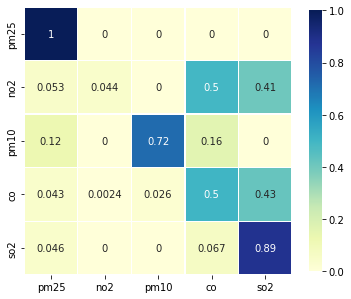

In [ ]:
y_pred=model.predict(X_test)
labels=['pm25','no2','pm10','co','so2']
plot_confusion_matrix(Y_test.argmax(axis=1),y_pred.argmax(axis=1),labels)